#### Questions: 
<ol>
    <li> Upload the data at "http://facweb1.redlands.edu/fac/Tamara_Veenstra/ML/fruits.csv" into a DataFrame. Then
    use LabelEncoder to convert fruit_name column from categorical to numerical data. Print out all the fruit names that are in the data.
        </li><li>
    Create a dictionary to convert from numerical value back to name of fruit.
    </li><li>
    Create X to be a DataFrame with the height and width columns. Create Y with the numerical data from fruit_name column. 
    </li><li>
    Split your data into training and testing data use "random_state=0". (with train_test_split)
    </li><li>
    Perform k nearest neighbors classification, with all ODD values from 1-43 as neighbors. (44 should be the length of your training set). Make predictions for fruit points in X_sample=np.array([[7.5,7.5],[9.2,7.2],[4.3,5.9],[7.5, 7.1]]) Use your dictionary to output the name of the fruit and not the value. E.g. it should print "apple" and not 0. 
    Explain what is happening as k increases by analyzing your data.
    </li><li>
    Perform k nearest neighbors classification, with all odd values from 1-43 as neighbors. Record the scores on the training and testing data and plot them on the same graph. 
    Which number of neighbors seems best for this data?
            </li><li> When is overfitting (high variance) occurring in your model? When is underfitting (high bias) occurring in your model?
      </li><li> Graph the decision boundaries for 1,3,5 neighbors. 
    </li><li> Graph the decision boundaries for 19,29, and 43 neighbors. 
    </li><li> Explain how you see the overfitting and underfitting in the decision boundaries. 
     </li><li> Repeat problems 5 and 6 but redo your train_test_split to use "random_state=5".  How did your performance change and why? Justify your answer based on your data. 
         </li><li> Repeat problem 6 but with X= height,mass, width and color_score columns  How did your performance change?
</li>  
</ol>    



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## 1. Upload the data at into a DataFrame. Then use LabelEncoder to convert fruit_name column from categorical to numerical data. Print out all the fruit names that are in the data.

In [2]:
# Import data using pandas
df = pd.read_csv(filepath_or_buffer='http://facweb1.redlands.edu/fac/Tamara_Veenstra/ML/fruits.csv', )
df.head()

,Unnamed: 0,fruit_name,fruit_subtype,height,mass,width,color_score
0,0,apple,granny_smith,7.3,192,8.4,0.55
1,1,apple,granny_smith,6.8,180,8.0,0.59
2,2,apple,granny_smith,7.2,176,7.4,0.60
3,3,mandarin,mandarin,4.7,86,6.2,0.80
4,4,mandarin,mandarin,4.6,84,6.0,0.79


In [3]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

le.fit(df['fruit_name'])

le.transform(df['fruit_name'])

print((le.classes_))

df['fruit_name']=le.transform(df['fruit_name'])

['apple' 'lemon' 'mandarin' 'orange']


In [4]:
df.head()

,Unnamed: 0,fruit_name,fruit_subtype,height,mass,width,color_score
0,0,0,granny_smith,7.3,192,8.4,0.55
1,1,0,granny_smith,6.8,180,8.0,0.59
2,2,0,granny_smith,7.2,176,7.4,0.60
3,3,2,mandarin,4.7,86,6.2,0.80
4,4,2,mandarin,4.6,84,6.0,0.79


## 2. Create a dictionary to convert from numerical value back to name of fruit.

In [5]:
fruit_dict = {0: "apple", 1:"lemon", 2: "mandarin", 3:"orange"}

## 3. Create X to be a DataFrame with the height and width columns. Create Y with the numerical data from fruit_name column.

In [6]:
X = df[["height","width"]].to_numpy()
print(X.shape)
y=df['fruit_name'].to_numpy()
print(y.shape)

(59, 2)
(59,)


## 4. Split your data into training and testing data

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
#print(np.std(X_train))
#X_train

## 5. Perform k nearest neighbors classification, with all ODD values from 1-43 as neighbors.

## 6.Perform k nearest neighbors classification, with all odd values from 1-43 as neighbors. Record the scores on the training and testing data and plot them on the same graph. Which number of neighbors seems best for this data?

apple
lemon
mandarin
orange
apple
lemon
mandarin
orange
apple
lemon
mandarin
orange
apple
lemon
mandarin
orange
apple
lemon
mandarin
orange
apple
lemon
mandarin
orange
apple
lemon
apple
apple
apple
lemon
apple
apple
apple
lemon
apple
apple
apple
lemon
apple
apple
apple
lemon
apple
apple
apple
lemon
apple
apple
apple
lemon
apple
apple
apple
lemon
apple
apple
apple
lemon
apple
apple
apple
lemon
apple
apple
apple
lemon
apple
apple
apple
lemon
apple
apple
apple
lemon
apple
apple
apple
apple
apple
apple
apple
apple
apple
apple
apple
apple
apple
apple


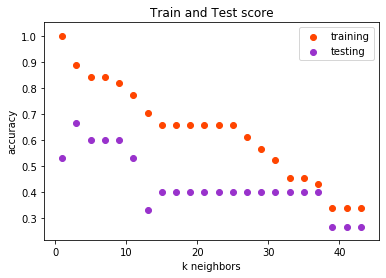

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
X_sample=np.array([[7.5,7.5],[9.2,7.2],[4.3,5.9],[7.5, 7.1]])
train_score = []
test_score = []

for i in range (1,44,2):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    
    fruit_pred = knn.predict(X_sample)
    
    #record scores of test and train
    train_score.append(knn.score(X_train,y_train))
    test_score.append(knn.score(X_test,y_test))
    
    #print("\nk =",i)
    for k in fruit_pred:
        fruit_pred = fruit_dict[k]
        print(fruit_pred)
        
        
#6) plot train and test scores on k neighbors
k_range = range(1,44,2)
plt.scatter(k_range,train_score, label = "training", color = "orangered")
plt.scatter(k_range,test_score, label = "testing", color = "darkorchid")
plt.xlabel("k neighbors")
plt.ylabel("accuracy")
plt.title("Train and Test score")
plt.legend()
plt.show()

## 7. When is overfitting (high variance) occurring in your model? When is underfitting (high bias) occurring in your model?

Overfitting happens when the model too strongly predicts the training data and can't be applied to new data and underfitting suggests the model does not fit, in other words, does not predict, the (training) data very well.  Overfitting might occur around the early k values such as 1 or 2 where we see high accuracy in the training data.  Underfitting occurs for the training and testing around the later k's such as at 40.  Between k=12 to k=30, it looks like the model is underfitted because it isn't prediting the training that well, and performs much worse for the testing.


## 8. Graph the decision boundaries for 1,3,5 neighbors.

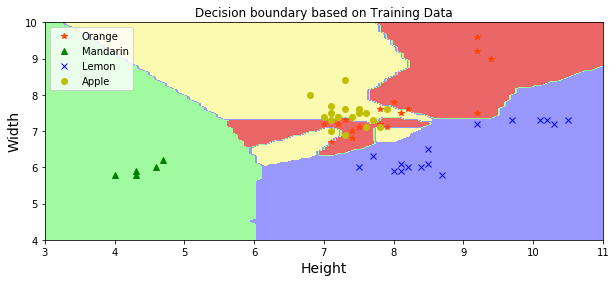

In [9]:
#Graph the decision boundaries for k = 1 neighbor

knn = KNeighborsClassifier(n_neighbors = 1) # perform knn with k = 1
knn.fit(X_train, y_train) # fit on the training data

# create meshgrid
x0, x1 = np.meshgrid(
        np.linspace(3, 11, 100).reshape(-1, 1),
        np.linspace(4, 10, 100).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_predict = knn.predict(X_new)

zz = y_predict.reshape(x0.shape)

# plotting figure
plt.figure(figsize=(10, 4))
plt.plot(X[y==3, 0], X[y==3, 1], color = "orangered", linestyle = "", marker = "*", label="Orange")
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Mandarin")
plt.plot(X[y==1, 0], X[y==1, 1], "bx", label="Lemon")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Apple")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0','#eb6767'])

# plot contours/decision boundary
plt.contourf(x0, x1, zz, cmap=custom_cmap)

plt.xlabel("Height", fontsize=14)
plt.ylabel("Width", fontsize=14)
plt.legend(loc="upper left", fontsize=10)
plt.axis()
plt.title("Decision boundary based on Training Data")
plt.show()

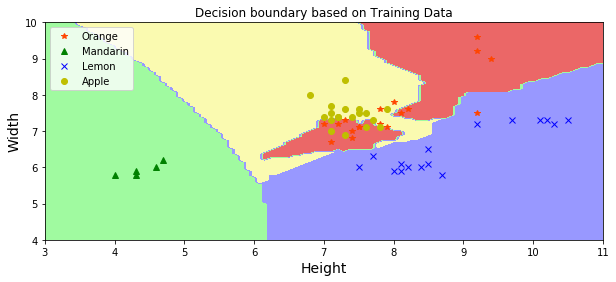

In [10]:
#Graph the decision boundaries for k = 3 neighbor

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)

x0, x1 = np.meshgrid(
        np.linspace(3, 11, 100).reshape(-1, 1),
        np.linspace(4, 10, 100).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_predict = knn.predict(X_new)

zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==3, 0], X[y==3, 1], color = "orangered", linestyle = "", marker = "*", label="Orange")
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Mandarin")
plt.plot(X[y==1, 0], X[y==1, 1], "bx", label="Lemon")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Apple")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0','#eb6767'])



plt.contourf(x0, x1, zz, cmap=custom_cmap)

plt.xlabel("Height", fontsize=14)
plt.ylabel("Width", fontsize=14)
plt.legend(loc="upper left", fontsize=10)
plt.axis()
plt.title("Decision boundary based on Training Data")
plt.show()

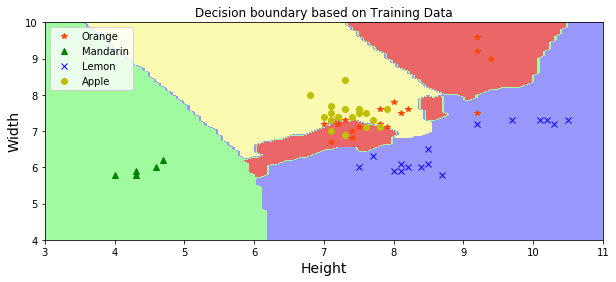

In [11]:
#Graph the decision boundaries for k = 5 neighbor
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)

x0, x1 = np.meshgrid(
        np.linspace(3, 11, 100).reshape(-1, 1),
        np.linspace(4, 10, 100).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_predict = knn.predict(X_new)

zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==3, 0], X[y==3, 1], color = "orangered", linestyle = "", marker = "*", label="Orange")
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Mandarin")
plt.plot(X[y==1, 0], X[y==1, 1], "bx", label="Lemon")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Apple")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0','#eb6767'])



plt.contourf(x0, x1, zz, cmap=custom_cmap)

plt.xlabel("Height", fontsize=14)
plt.ylabel("Width", fontsize=14)
plt.legend(loc="upper left", fontsize=10)
plt.axis()
plt.title("Decision boundary based on Training Data")
plt.show()

## 9. Graph the decision boundaries for 19,29, and 43 neighbors.

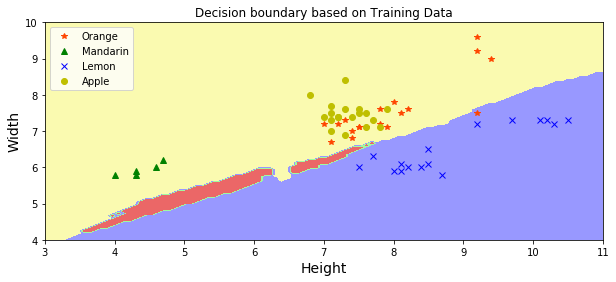

In [12]:
#Graph the decision boundaries for k = 19 neighbor
knn = KNeighborsClassifier(n_neighbors = 19)
knn.fit(X_train, y_train)

x0, x1 = np.meshgrid(
        np.linspace(3, 11, 100).reshape(-1, 1),
        np.linspace(4, 10, 100).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_predict = knn.predict(X_new)

zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==3, 0], X[y==3, 1], color = "orangered", linestyle = "", marker = "*", label="Orange")
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Mandarin")
plt.plot(X[y==1, 0], X[y==1, 1], "bx", label="Lemon")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Apple")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0','#eb6767'])



plt.contourf(x0, x1, zz, cmap=custom_cmap)

plt.xlabel("Height", fontsize=14)
plt.ylabel("Width", fontsize=14)
plt.legend(loc="upper left", fontsize=10)
plt.axis()
plt.title("Decision boundary based on Training Data")
plt.show()

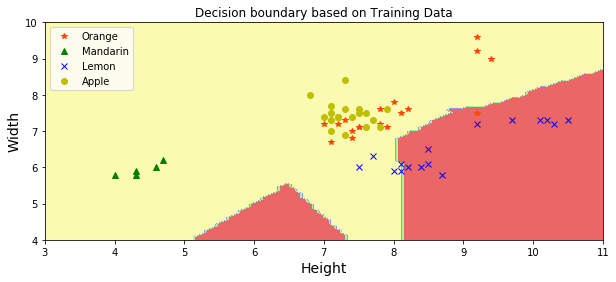

In [13]:
#Graph the decision boundaries for k = 29 neighbor
knn = KNeighborsClassifier(n_neighbors = 29)
knn.fit(X_train, y_train)

x0, x1 = np.meshgrid(
        np.linspace(3, 11, 100).reshape(-1, 1),
        np.linspace(4, 10, 100).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_predict = knn.predict(X_new)

zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==3, 0], X[y==3, 1], color = "orangered", linestyle = "", marker = "*", label="Orange")
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Mandarin")
plt.plot(X[y==1, 0], X[y==1, 1], "bx", label="Lemon")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Apple")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0','#eb6767'])



plt.contourf(x0, x1, zz, cmap=custom_cmap)

plt.xlabel("Height", fontsize=14)
plt.ylabel("Width", fontsize=14)
plt.legend(loc="upper left", fontsize=10)
plt.axis()
plt.title("Decision boundary based on Training Data")
plt.show()

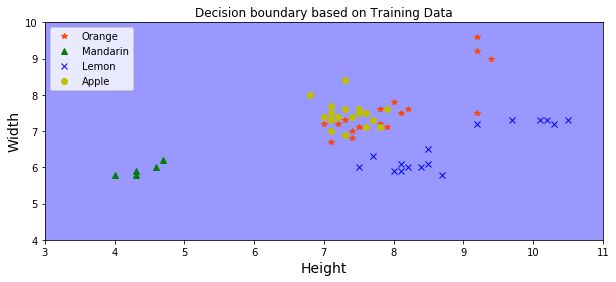

In [14]:
#Graph the decision boundaries for k = 43 neighbor
knn = KNeighborsClassifier(n_neighbors = 43)
knn.fit(X_train, y_train)

x0, x1 = np.meshgrid(
        np.linspace(3, 11, 100).reshape(-1, 1),
        np.linspace(4, 10, 100).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_predict = knn.predict(X_new)

zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==3, 0], X[y==3, 1], color = "orangered", linestyle = "", marker = "*", label="Orange")
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Mandarin")
plt.plot(X[y==1, 0], X[y==1, 1], "bx", label="Lemon")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Apple")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0','#eb6767'])



plt.contourf(x0, x1, zz, cmap=custom_cmap)

plt.xlabel("Height", fontsize=14)
plt.ylabel("Width", fontsize=14)
plt.legend(loc="upper left", fontsize=10)
plt.axis()
plt.title("Decision boundary based on Training Data")
plt.show()

## 10. Explain how you see the overfitting and underfitting in the decision boundaries.

Overfitting occurs when the model is predicting the data too well, where the model would perform poorly for new general data.  It looks like with a k=5 or maybe k=3 , is where we see the most overfitting because there's colored pockets that are formed directly around a few red points.  Underfitting occurs when the data isn't fitted very accurately, with very high K's, such as 43 where we see all apples, or even 29 where we even lose colors and boundaries.

## 11. Repeat problems 5 and 6 but redo your train_test_split to use "random_state=5". How did your performance change and why? Justify your answer based on your data.

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5)
#print(np.std(X_train))
#print(X_train)
#print(X_test)

apple
lemon
mandarin
orange
apple
lemon
mandarin
orange
apple
lemon
mandarin
orange
apple
lemon
apple
orange
apple
lemon
apple
orange
apple
lemon
apple
orange
apple
lemon
apple
orange
apple
lemon
apple
orange
apple
lemon
apple
apple
apple
lemon
apple
apple
apple
lemon
apple
apple
apple
lemon
apple
apple
apple
lemon
apple
apple
apple
lemon
apple
apple
apple
lemon
apple
apple
apple
lemon
apple
apple
apple
orange
apple
apple
apple
orange
apple
apple
apple
orange
apple
apple
apple
orange
apple
apple
apple
apple
apple
apple
apple
apple
apple
apple


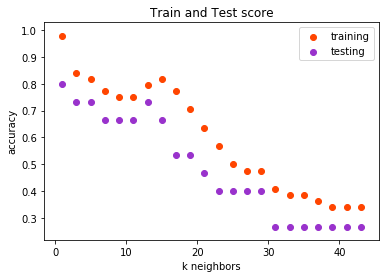

In [16]:
X_sample=np.array([[7.5,7.5],[9.2,7.2],[4.3,5.9],[7.5, 7.1]])
train_score = []
test_score = []

for i in range (1,44,2):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    
    fruit_pred = knn.predict(X_sample)
    
    #record scores of test and train
    train_score.append(knn.score(X_train,y_train))
    test_score.append(knn.score(X_test,y_test))
    
    #print("\nk =",i)
    for k in fruit_pred:
        fruit_pred = fruit_dict[k]
        print(fruit_pred)
        
        
#6) plot train and test scores on k neighbors
k_range = range(1,44,2)
plt.scatter(k_range,train_score, label = "training", color = "orangered")
plt.scatter(k_range,test_score, label = "testing", color = "darkorchid")
plt.xlabel("k neighbors")
plt.ylabel("accuracy")
plt.title("Train and Test score")
plt.legend()
plt.show()

The random state of 5 performed better where we testing matched a lot closer to the training and you don't see dramatic gaps between the two curves.  If I output the old X_train with random state = 0, there seems to be more variation in the data, while if I output the X_train with random_state =5, then there is less variation in the data.

## 12. Repeat problem 6 but with X= height,mass, width and color_score columns How did your performance change?

(59, 4)
(59,)


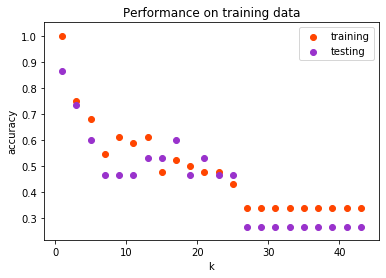

In [17]:
X = df[["height","mass", "width", "color_score"]].to_numpy()
print(X.shape)
y=df['fruit_name'].to_numpy()
print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5)

k_range = range(1,44, 2)

scores_train = []
scores_test = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores_train.append(knn.score(X_train, y_train))
    scores_test.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.title("Performance on training data")
plt.scatter(k_range, scores_train, label = "training", color = "orangered")
plt.scatter(k_range, scores_test, label = "testing", color = "darkorchid")
plt.scatter
plt.legend()
plt.show()


The performance changed where at one point, the model was underfitting the testing data. In general, the model did looks like it performs pretty well since the testing data remains close to the training curve.  